To work out the fundamental relationships between difference cryptos

Part 1: BTC and ETH

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = '2018-01-01'

In [3]:
def hist_r(ticker):
    full_data = pd.read_csv(r'data 041018\{}.csv'.format(str(ticker)))
    price = full_data[['date','price(USD)']].set_index('date')
    return (price.pct_change()[1:])

In [4]:
def hist_p(ticker):
    full_data = pd.read_csv(r'data 041018\{}.csv'.format(str(ticker)))
    price = full_data[['date','price(USD)']].set_index('date')
    return (price)

In [5]:
eth_r = hist_r('eth')
btc_r = hist_r('btc')

In [6]:
eth_r.index = pd.to_datetime(eth_r.index)
btc_r.index = pd.to_datetime(btc_r.index)

In [7]:
eth_r16 = eth_r.iloc[eth_r.index>start]
btc_r16 = btc_r.iloc[btc_r.index>start]

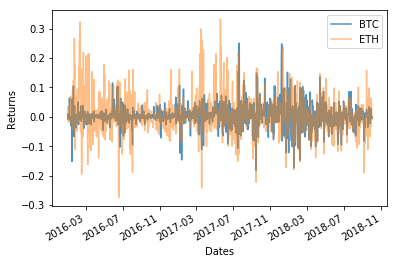

In [8]:
fig, ax1 = plt.subplots()
plt.plot(btc_r16, alpha=0.8)
plt.plot(eth_r16, alpha=0.5)

plt.xlabel('Dates')
plt.ylabel('Returns')
plt.legend(['BTC','ETH'])

fig.autofmt_xdate()

In [5]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import math

In [11]:
def lr_model_analysis(x_name,y_name,start):
    #obtain the price data
    X = hist_p(x_name)
    Y = hist_p(y_name)
    X = X.loc[X.index>start]
    Y = Y.loc[Y.index>start]
    #setup for regression
    X_c = sm.add_constant(X)
    lr_model = regression.linear_model.OLS(Y,X_c).fit()
    # y = mx + c
    c = lr_model.params[0]
    m = lr_model.params[1]
    #plot
    X2 = np.linspace(X.min(), X.max(), 50)
    Y_hat = m*X2 + c
    plt.scatter(X, Y, alpha = 0.3)
    plt.plot(X2,Y_hat,'r',alpha=0.8)
    #label
    plt.ylabel('{} Price'.format(str(y_name)))
    plt.xlabel('{} Price'.format(str(x_name)))
    return(lr_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price(USD)   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     66.59
Date:                Thu, 04 Oct 2018   Prob (F-statistic):           1.25e-14
Time:                        12:30:32   Log-Likelihood:                -2469.9
No. Observations:                 274   AIC:                             4944.
Df Residuals:                     272   BIC:                             4951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5862.1672    329.647     17.783      0.000    5213.184    6511.151
price(USD)   273.1659     33.476      8.160      0.000     207.261     339.071
==============================================================================
Omnibus:                      103.401   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.476
Skew:                           1.755   Prob(JB):                     1.25e-61
Kurtosis:                       6.499   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

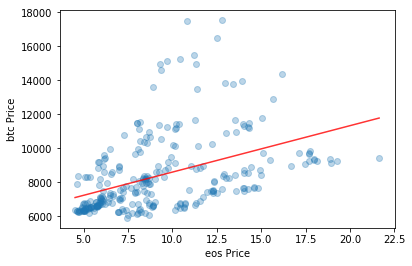

In [12]:
lr_model_analysis('eos','btc',start)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price(USD)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     791.2
Date:                Thu, 04 Oct 2018   Prob (F-statistic):           1.69e-82
Time:                        12:30:33   Log-Likelihood:                -2313.1
No. Observations:                 274   AIC:                             4630.
Df Residuals:                     272   BIC:                             4637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4182.1628    163.554     25.570      0.000    3860.169    4504.156
price(USD)     7.0837      0.252     28.129      0.000       6.588       7.579
==============================================================================
Omnibus:                      136.075   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.767
Skew:                           1.911   Prob(JB):                    1.13e-195
Kurtosis:                      11.001   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

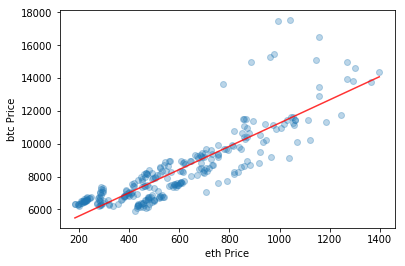

In [13]:
lr_model_analysis('eth','btc',start)